In [ ]:
import torch

**Computation Graph**

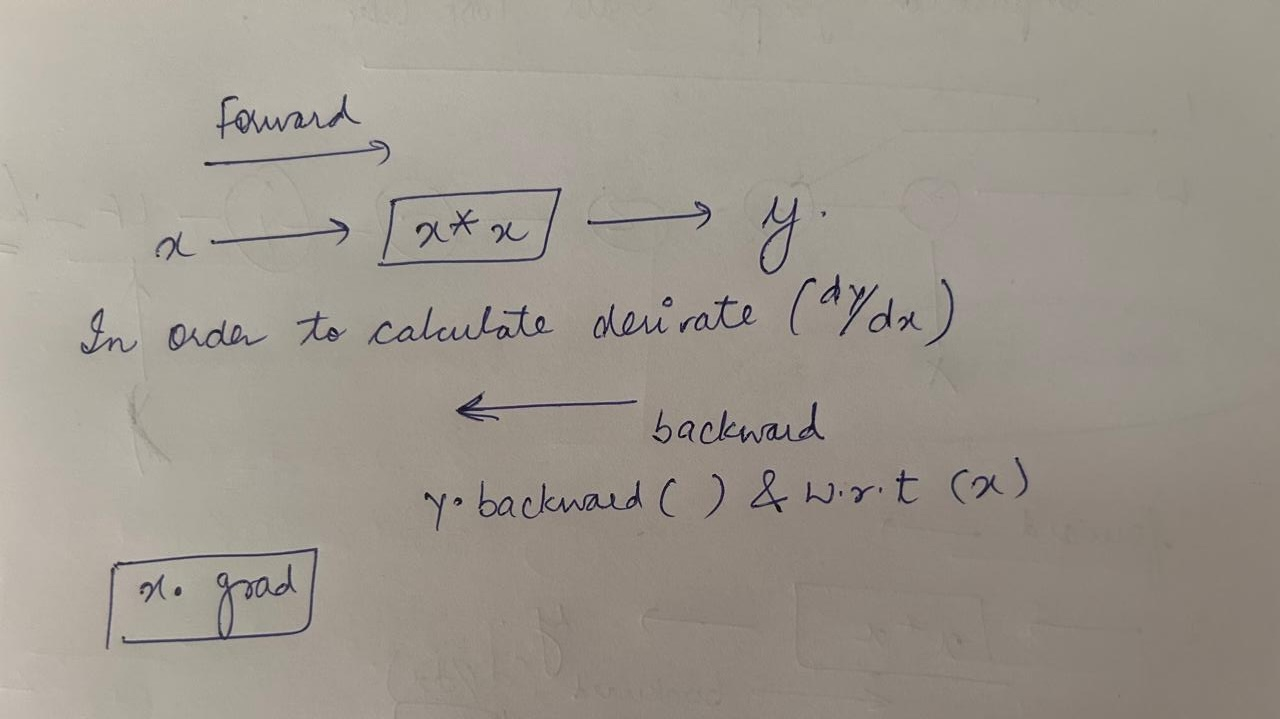

In [ ]:
x = torch.tensor(3.0, requires_grad=True)      # so that it should understand we need to calculate its derivate (y = x^2)


In [ ]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
y.backward()  # Triggers backward pass

In [ ]:
x.grad   # dy/dx = 2x = 6

tensor(6.)

In [ ]:
# Example :2
# in maths
import math

def dz_dx(x):
    return 2 * x * math.cos(x**2)



In [ ]:
dz_dx(3)

-5.466781571308061

In [ ]:
# let's do in pytorch

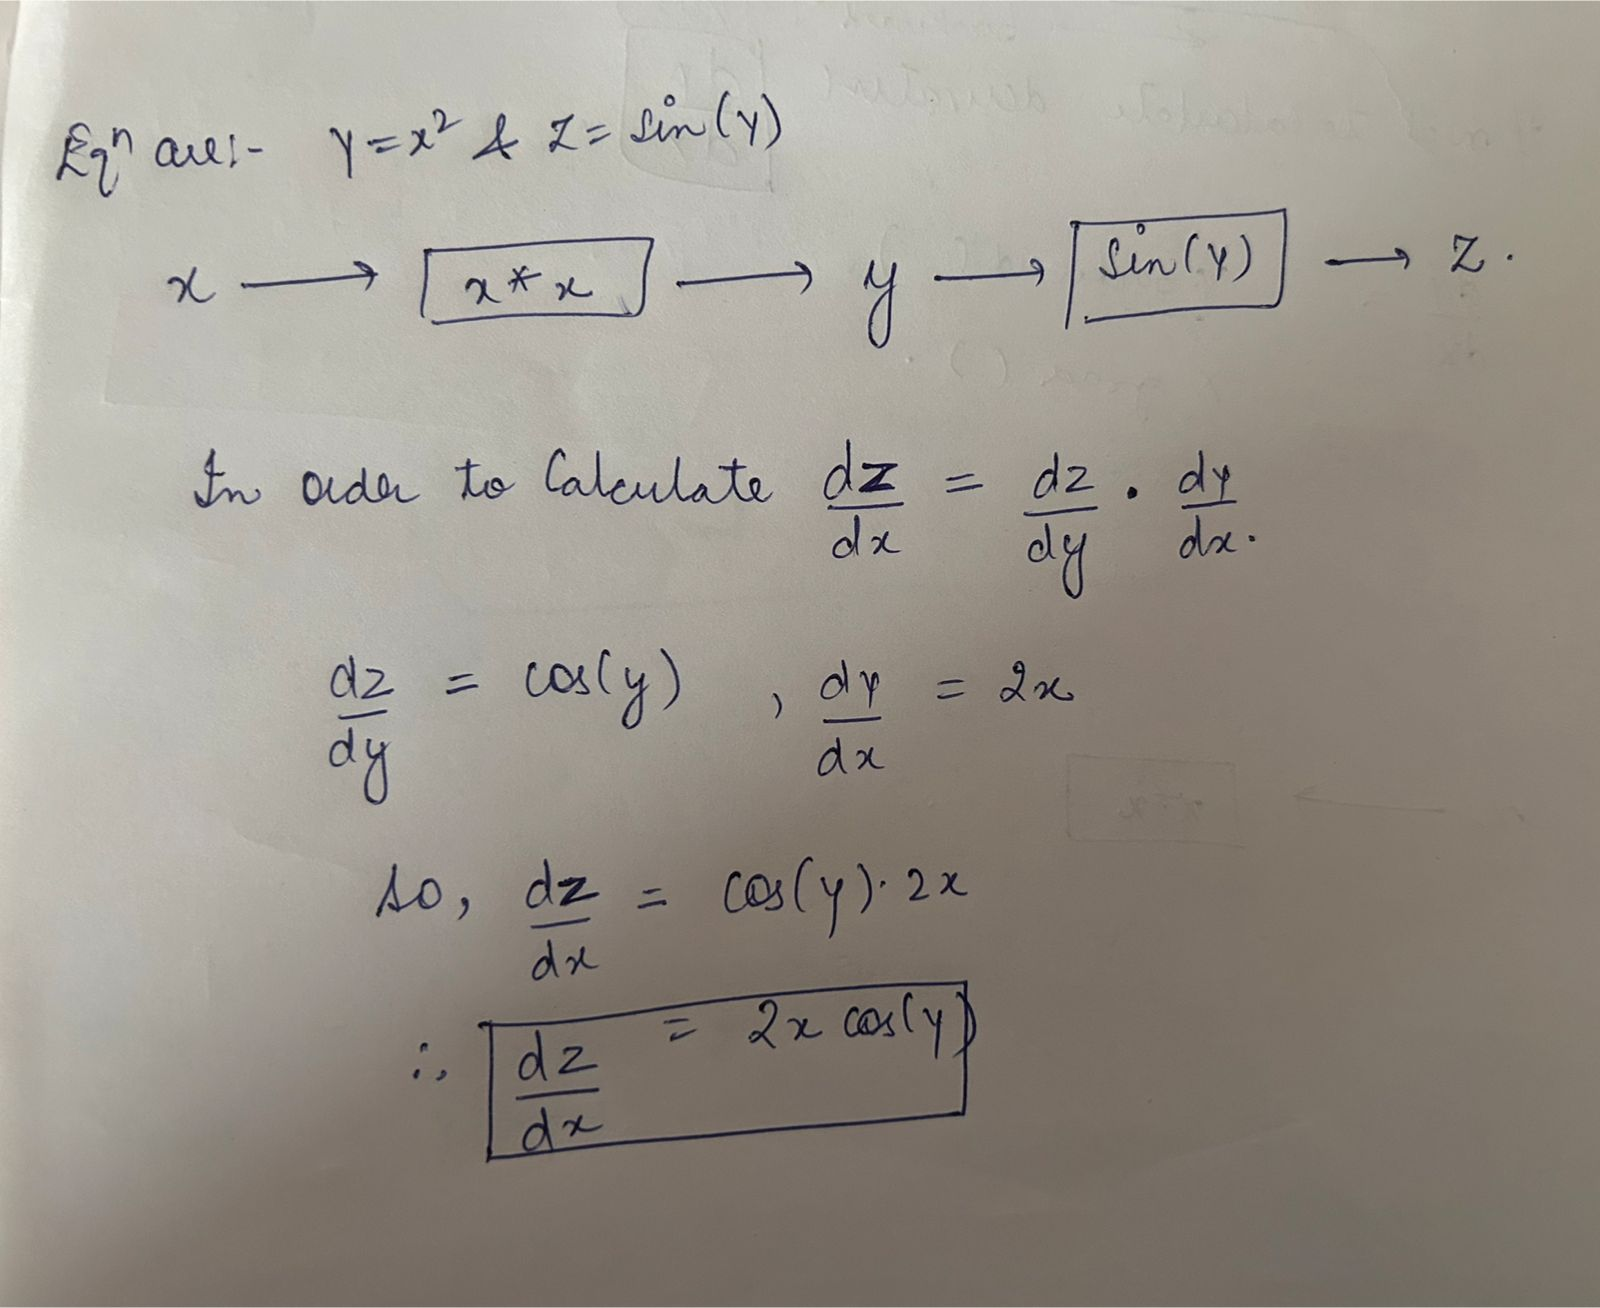

In [ ]:
import torch
x = torch.tensor(3.0, requires_grad=True)

In [ ]:
y = x ** 2
z = torch.sin(y)

In [ ]:
x

tensor(3., requires_grad=True)

In [ ]:
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [ ]:
z.backward()

In [ ]:
x.grad # dz/dx (it automatically computes dy/dx)

tensor(-5.4668)

# Example:3

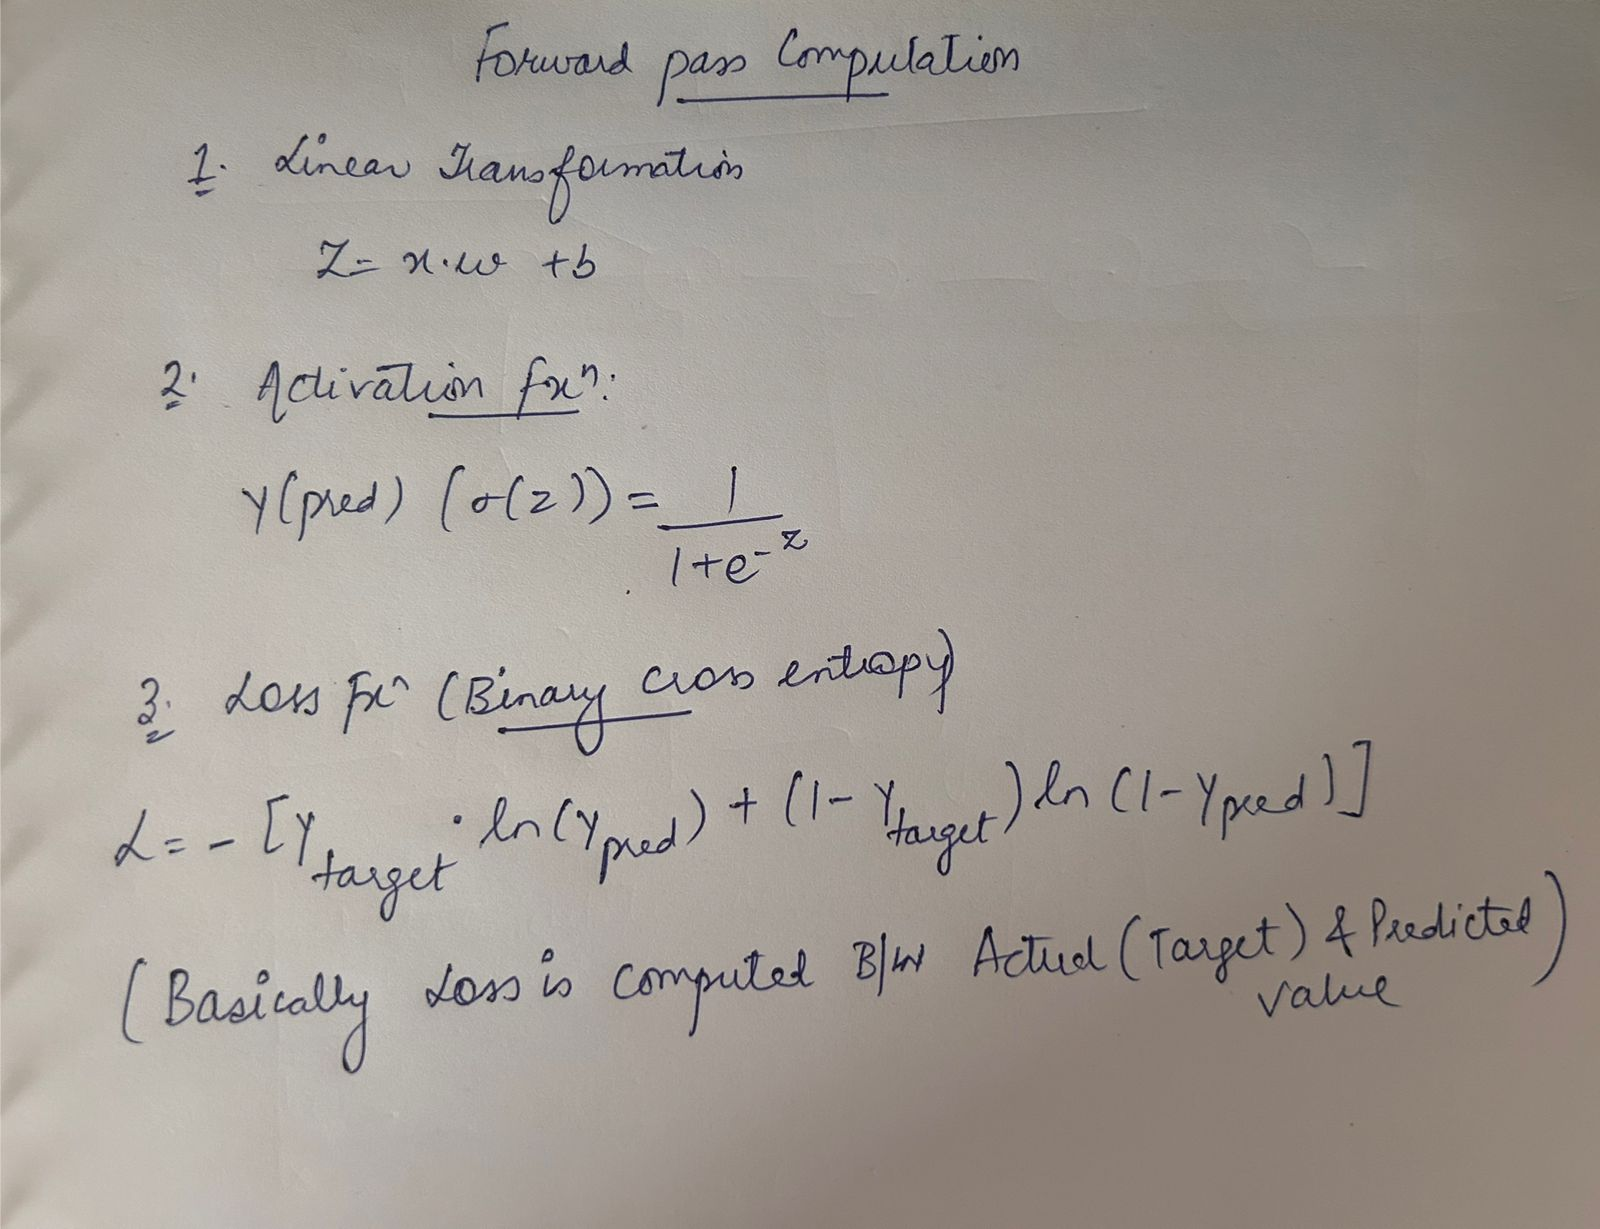

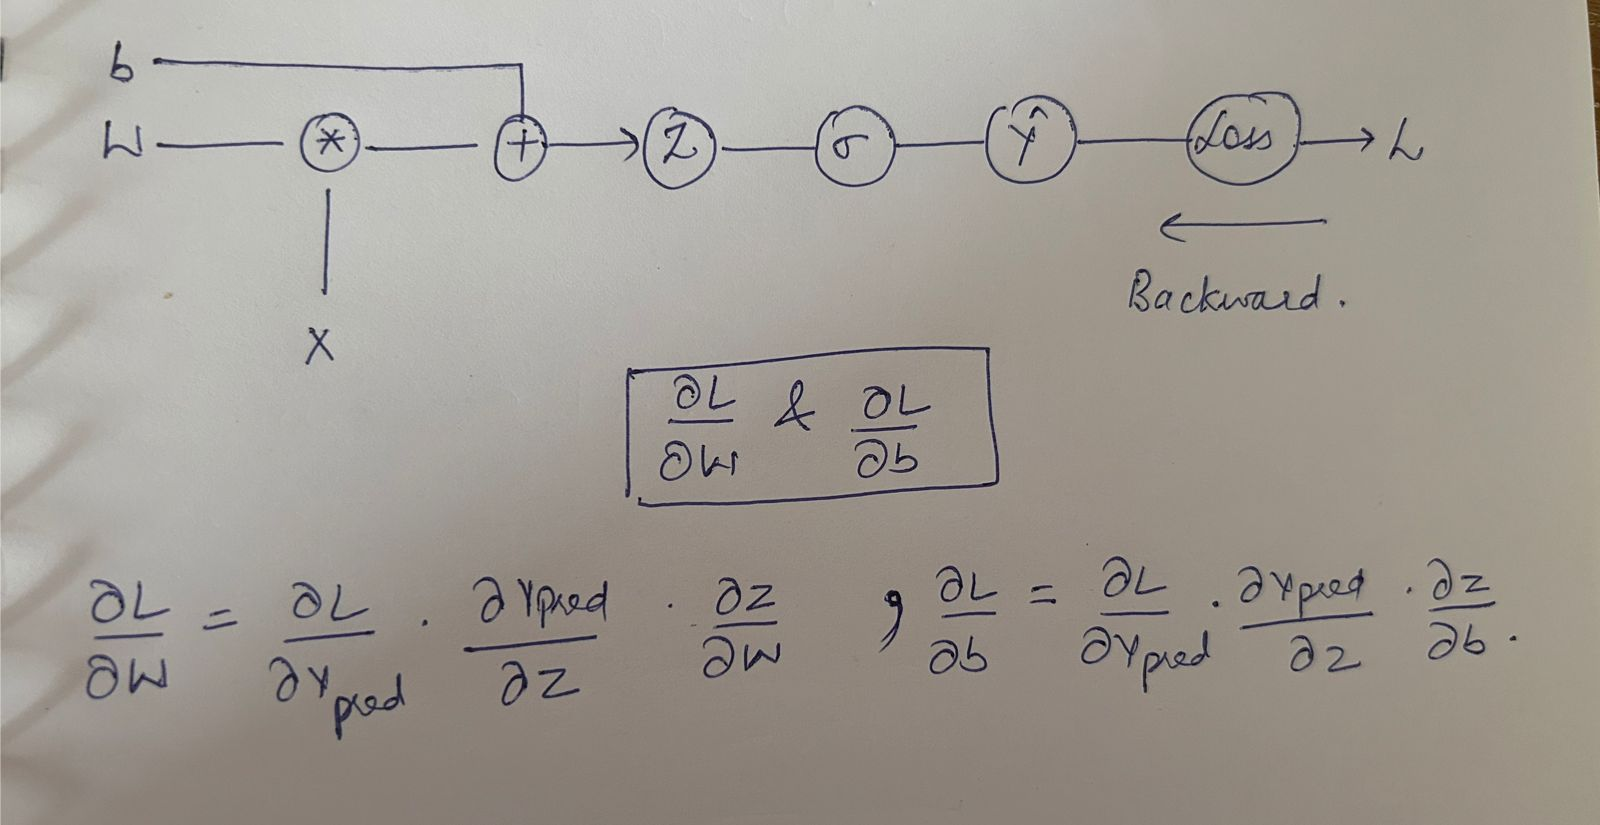

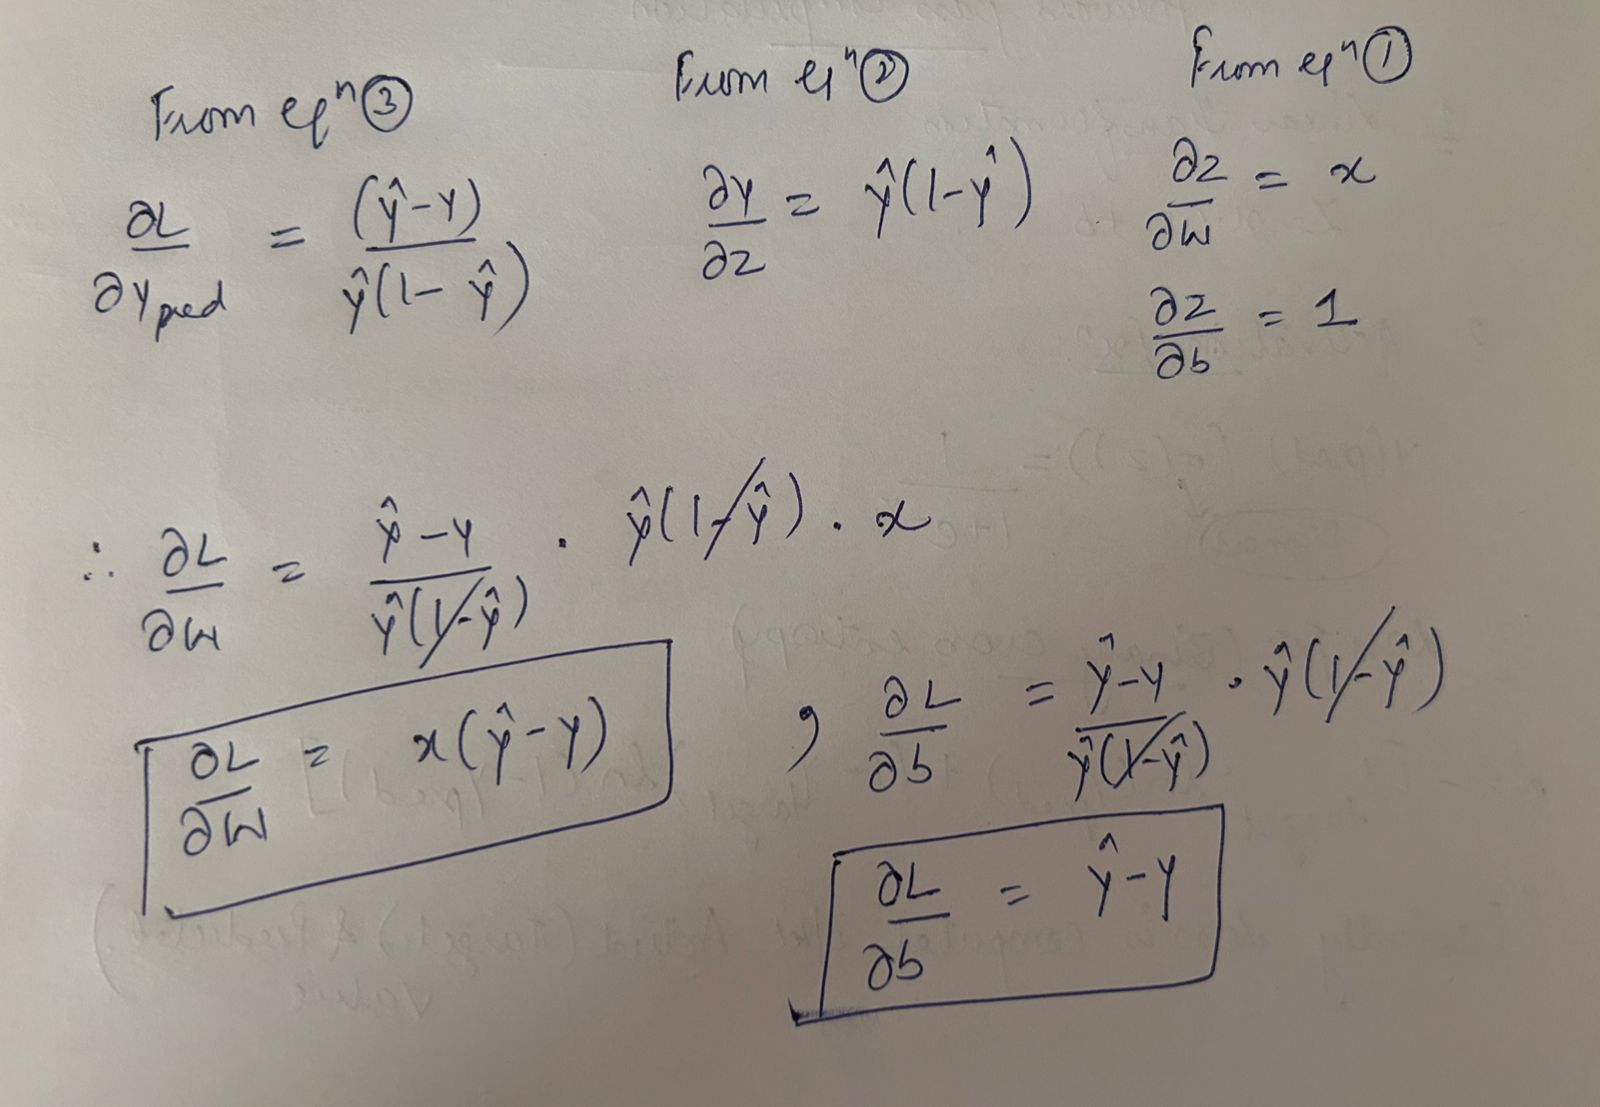

In [ ]:
# manually:

import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [ ]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [ ]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [ ]:
loss

tensor(6.7012)

In [ ]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [ ]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


In [ ]:
# now using autograd

x = torch.tensor(6.7)
y = torch.tensor(0.0)

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [ ]:
w

tensor(1., requires_grad=True)

In [ ]:
b

tensor(0., requires_grad=True)

In [ ]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [ ]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [ ]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [ ]:
loss.backward()

In [ ]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


### Vector I/P example

In [ ]:

x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
x

tensor([1., 2., 3.], requires_grad=True)

In [ ]:
y = (x **2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [ ]:
y.backward()

In [ ]:
x.grad

tensor([0.6667, 1.3333, 2.0000])